<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection  import chi2, SelectKBest,mutual_info_classif,SelectPercentile,f_classif
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("/content/crxdata.csv", header  = None)

In [78]:
df.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',
            'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus']

In [79]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [80]:
df_new  = df.replace('?', np.nan)

In [81]:
df_final =  df_new.dropna()

In [82]:
categorical = [var for var in df_new.columns if df_final[var].dtype == 'O']

In [83]:
categorical

['Gender',
 'Age',
 'Married',
 'BankCustomer',
 'EducationLevel',
 'Ethnicity',
 'PriorDefault',
 'Employed',
 'DriversLicense',
 'Citizen',
 'ZipCode',
 'ApprovalStatus']

In [ ]:
for i in range(len(categorical)):
  print(df_final[categorical[i]].value_counts())

In [87]:
df_final.head(1)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,00202,0,+


In [ ]:
df_final['Gender'] = LabelEncoder().fit_transform(df_final['Gender'])
df_final['Married'] = LabelEncoder().fit_transform(df_final['Married'])
df_final['BankCustomer'] = LabelEncoder().fit_transform(df_final['BankCustomer'])
df_final['EducationLevel'] = LabelEncoder().fit_transform(df_final['EducationLevel'])
df_final['Ethnicity'] = LabelEncoder().fit_transform(df_final['Ethnicity'])
df_final['PriorDefault'] = LabelEncoder().fit_transform(df_final['PriorDefault'])
df_final['Employed'] = LabelEncoder().fit_transform(df_final['Employed'])
df_final['DriversLicense'] = LabelEncoder().fit_transform(df_final['DriversLicense'])
df_final['Citizen'] = LabelEncoder().fit_transform(df_final['Citizen'])
df_final['ApprovalStatus'] = LabelEncoder().fit_transform(df_final['ApprovalStatus'])

In [90]:
X = df_final.drop(['ApprovalStatus'], axis =1)
y =  df_final['ApprovalStatus']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
test = SelectKBest(score_func=chi2, k=len(X.columns)).fit(X,y)
np.set_printoptions(precision=3)
score  =  test.scores_

In [92]:
Y = X.columns

Text(0, 0.5, 'Features name')

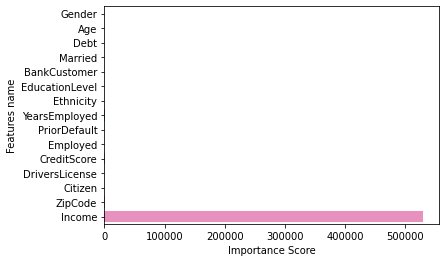

In [93]:
sns.barplot(x  = score,y = Y )
plt.xlabel('Importance Score')
plt.ylabel('Features name')

In [94]:
score

array([7.972e-02, 9.424e+01, 1.463e+02, 3.139e+00, 2.877e+01, 3.170e+01,
       9.695e-02, 3.655e+02, 1.659e+02, 7.473e+01, 1.061e+03, 8.779e-01,
       1.205e+01, 7.435e+02, 5.298e+05])

In [102]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

In [103]:
rf.feature_importances_

array([0.007, 0.05 , 0.082, 0.016, 0.006, 0.03 , 0.021, 0.048, 0.529,
       0.018, 0.034, 0.007, 0.009, 0.093, 0.049])

Text(0.5, 0, 'Feature Importance')

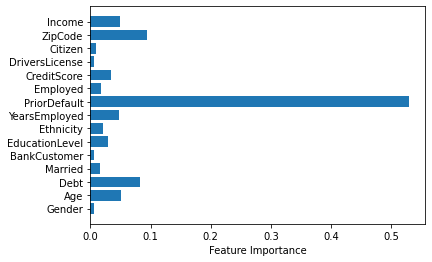

In [104]:
sort = rf.feature_importances_
plt.barh(X.columns, rf.feature_importances_)
plt.xlabel("Feature Importance")

In [106]:
clf = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [111]:
result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

Text(0.5, 0, 'Feature Importance MEAN')

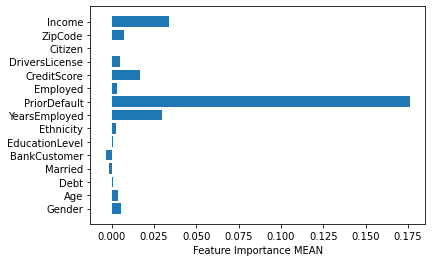

In [112]:
plt.barh(X.columns, result.importances_mean )
plt.xlabel("Feature Importance MEAN")

Text(0.5, 0, 'Feature Importance STD')

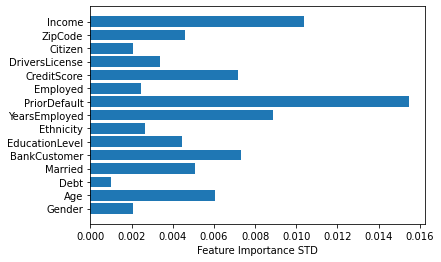

In [113]:
plt.barh(X.columns, result.importances_std)
plt.xlabel("Feature Importance STD")

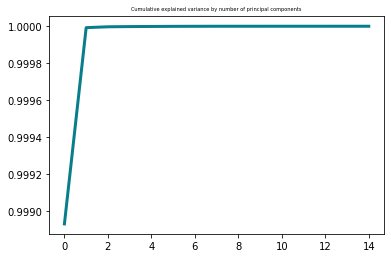

In [115]:
pca = PCA().fit(X_train)
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=5)
plt.show()

In [118]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    index=X.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Gender,0.020850,0.036329,0.027864,-0.013719,0.018361,-0.001491,0.042177,-0.021425,0.063571,0.106073,-0.115665,0.259058,-0.337557,-0.029316,0.000871
Age,-0.147735,-0.772376,11.437322,-0.905843,0.027519,0.030175,-0.228104,-0.093048,0.005855,-0.000300,0.000678,-0.000626,0.000814,-0.000971,0.000043
Debt,0.649189,-1.112190,1.122267,3.370970,-0.780904,-3.171898,-0.406608,-0.029483,0.011888,0.007368,-0.001048,0.000692,0.000974,-0.004149,-0.000044
Married,-0.052276,0.011311,-0.038248,-0.040668,0.035014,-0.002575,-0.002101,0.022769,0.416019,-0.018212,-0.001819,-0.020865,-0.006783,-0.003313,-0.058510
BankCustomer,0.001542,0.027284,-0.088096,-0.081244,0.073168,-0.015002,0.011573,0.054301,0.831309,-0.009074,-0.000619,-0.045215,0.005994,-0.010912,0.029272


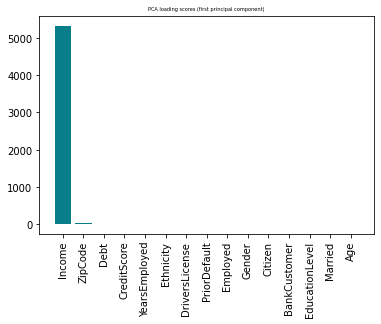

In [119]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

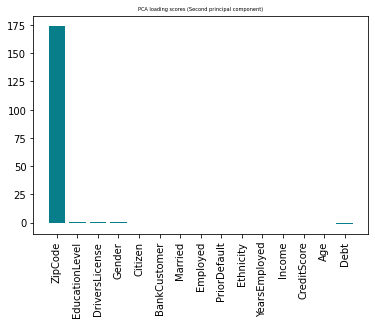

In [120]:
pc2_loadings = loadings.sort_values(by='PC2', ascending=False)[['PC2']]
pc2_loadings = pc2_loadings.reset_index()
pc2_loadings.columns = ['Attribute', 'CorrelationWithPC2']

plt.bar(x=pc2_loadings['Attribute'], height=pc2_loadings['CorrelationWithPC2'], color='#087E8B')
plt.title('PCA loading scores (Second principal component)', size=5)
plt.xticks(rotation='vertical')
plt.show()

In [123]:
fs_fit_fscore = SelectKBest(f_classif, k=len(X.columns))
fs_fit_fscore.fit_transform(X_train, y_train)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:len(X.columns)]
fs_indices_fscore

array([ 8,  9, 10,  7,  2,  3,  4, 14,  1,  5, 12, 13, 11,  0,  6])

In [124]:
best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['PriorDefault', 'Employed', 'CreditScore', 'YearsEmployed', 'Debt',
       'Married', 'BankCustomer', 'Income', 'Age', 'EducationLevel',
       'Citizen', 'ZipCode', 'DriversLicense', 'Gender', 'Ethnicity'],
      dtype=object)

In [125]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([5.777e+02, 1.294e+02, 8.626e+01, 6.110e+01, 2.870e+01, 1.769e+01,
       1.533e+01, 1.351e+01, 1.109e+01, 6.236e+00, 5.218e+00, 3.523e+00,
       1.582e+00, 1.230e-01, 8.595e-02])

Text(0, 0.5, 'Features')

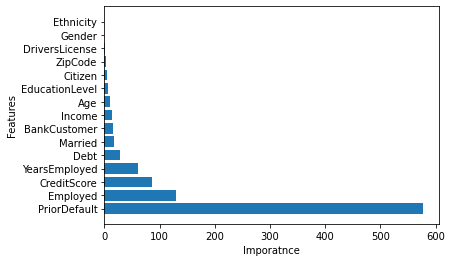

In [126]:
plt.barh(best_features_fscore, feature_importances_fscore)
plt.xlabel('Imporatnce')
plt.ylabel('Features')

In [128]:
fs_fit_mutual_info = SelectKBest(mutual_info_classif, k=len(X.columns))
fs_fit_mutual_info.fit_transform(X_train, y_train)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:len(X.columns)]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['PriorDefault', 'CreditScore', 'Income', 'Employed',
       'YearsEmployed', 'Ethnicity', 'Debt', 'EducationLevel', 'Married',
       'ZipCode', 'BankCustomer', 'Age', 'Citizen', 'DriversLicense',
       'Gender'], dtype=object)

In [129]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.283, 0.175, 0.098, 0.092, 0.077, 0.064, 0.046, 0.04 , 0.029,
       0.024, 0.017, 0.009, 0.003, 0.   , 0.   ])

Text(0, 0.5, 'Features')

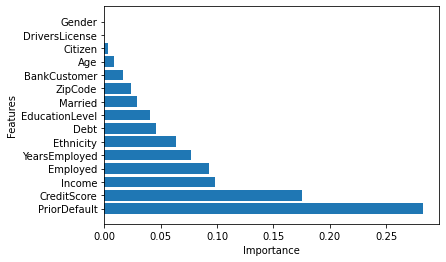

In [130]:
plt.barh(best_features_mutual_info,feature_importances_mutual_info)
plt.xlabel('Importance')
plt.ylabel('Features')

In [131]:
df_corr = df_final.corr()

In [132]:
df_corr['ApprovalStatus']

Gender            0.019817
Debt             -0.207086
Married           0.179700
BankCustomer      0.169976
EducationLevel   -0.123314
Ethnicity         0.011023
YearsEmployed    -0.332728
PriorDefault     -0.738829
Employed         -0.451866
CreditScore      -0.406052
DriversLicense   -0.050011
Citizen           0.100785
Income           -0.172766
ApprovalStatus    1.000000
Name: ApprovalStatus, dtype: float64

In [ ]:
estimator = LinearSVC()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_train, y_train)
index = selector.ranking_.argsort()
X.columns[index]